In [69]:
import pandas as pd  
import plotly.express as px
import matplotlib.pyplot as plt
import random

# Data loading & cleaning

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/DATASET/dataset.csv')

In [3]:
df.shape

(72134, 4)

In [4]:
df.head(3)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


# EDA before PreProcessing the data

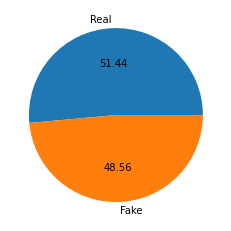

In [6]:
plt.pie(df['label'].value_counts(), labels=['Real', 'Fake'], autopct = "%0.2f")
plt.show()

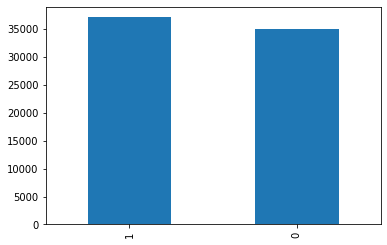

In [7]:
df['label'].value_counts().plot(kind = 'bar')

In [8]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size=10, background_color = 'black')

**WordCloud RealNews Text**

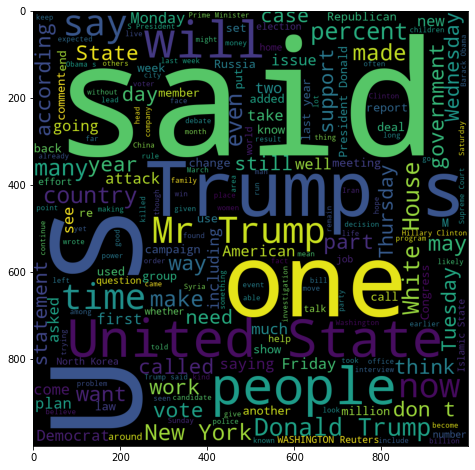

In [9]:
true=wc.generate(df[df['label']==0]['text'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.imshow(true)

**WordCloud FakeNews Title**

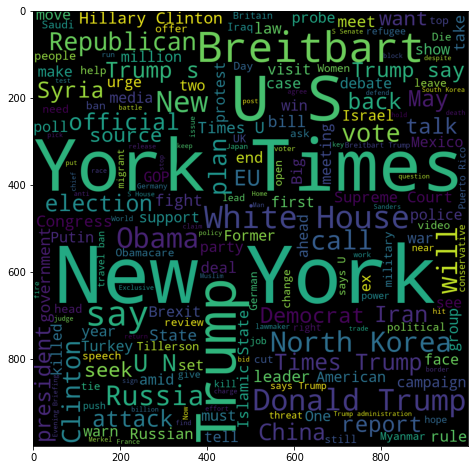

In [10]:
real_news_title =wc.generate(df[df['label']==0]['title'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.imshow(real_news_title)

**WordCloud FakeNews Text**

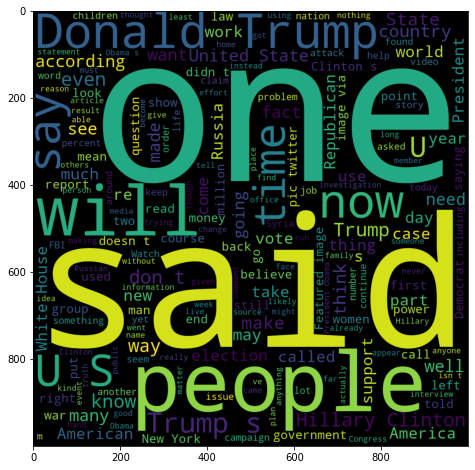

In [11]:
fake_news_text = wc.generate(df[df['label']==1]['text'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.imshow(fake_news_text)

**WordCloud FakeNews Title** 

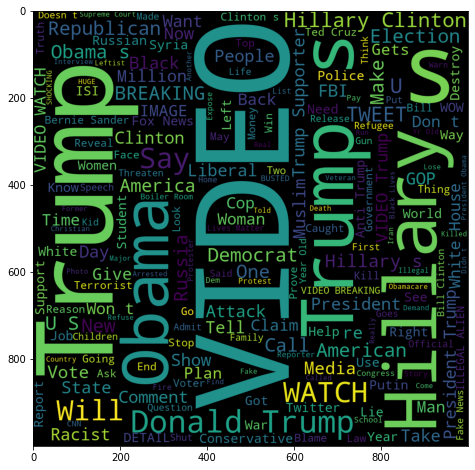

In [12]:
fake_news_title =wc.generate(df[df['label']==1]['title'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.imshow(fake_news_title)

# Data Analysis

**Using CountVectorizer to see top 10 words**

In [13]:
df['total_content'] = df['title']+ ' '+ df['text']

In [14]:
df.head(3)

,Unnamed: 0,title,text,label,total_content
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,NaN,Did they post their votes for Hillary already?,1,NaN
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...


In [15]:
df.isnull().values.any()

True

In [16]:
df.isnull().sum()

Unnamed: 0         0
title            558
text              39
label              0
total_content    597
dtype: int64

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0       0
title            0
text             0
label            0
total_content    0
dtype: int64

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
matrix  = vectorizer.fit_transform(df['total_content'])
sorted(vectorizer.vocabulary_)
len(vectorizer.vocabulary_)

244054

In [ ]:
vectorizer.vocabulary_ # return a dict

In [20]:
type(vectorizer.vocabulary_)

dict

In [ ]:
sorted(vectorizer.vocabulary_, key=vectorizer.vocabulary_.get, reverse=True)[:500]

**Using TF-IDF to see top 10 words**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
x = obj.fit_transform(df['total_content'])
words_set = obj.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Pre processing

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string 
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
nltk.download('punkt')

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
def lemmatization(content):
    lemmatized_content = re.sub('[^a-zA-Z]',' ',content)
    lemmatized_content = lemmatized_content.lower() 
    lemmatized_content = lemmatized_content.split() 
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if not word in stopwords.words('english')]
    lemmatized_content = ' '.join(lemmatized_content)
    return lemmatized_content

In [46]:
words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())


In [28]:
df['total_content'] = df['total_content'].apply(lemmatization)

In [37]:
df['title'] = df['title'].apply(lemmatization)

In [38]:
df['text'] = df['text'].apply(lemmatization)

In [57]:
# for removing un-neccessary words
df['title'] = df['title'].apply(clean_sent)
df['text'] = df['text'].apply(clean_sent)

# Data Analysis after Pre Processing

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

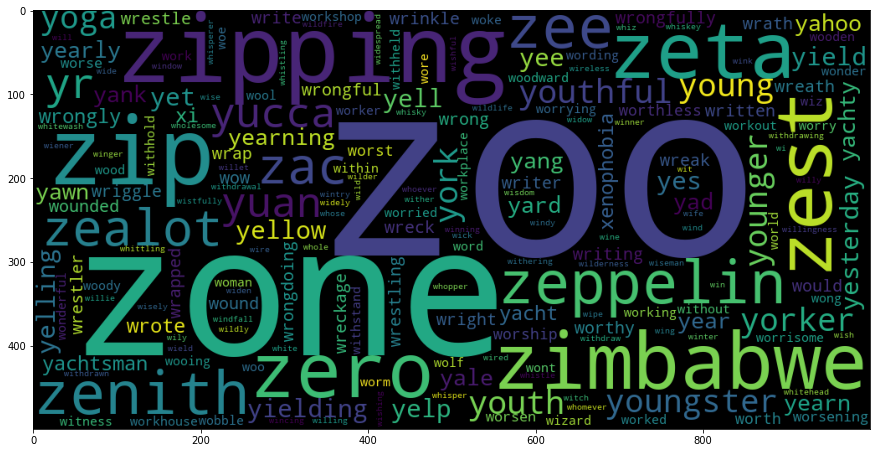

In [73]:
matrix1  = vectorizer.fit_transform(df[df['label']==0]['title'])
overall_title = vectorizer.vocabulary_
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(overall_title)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

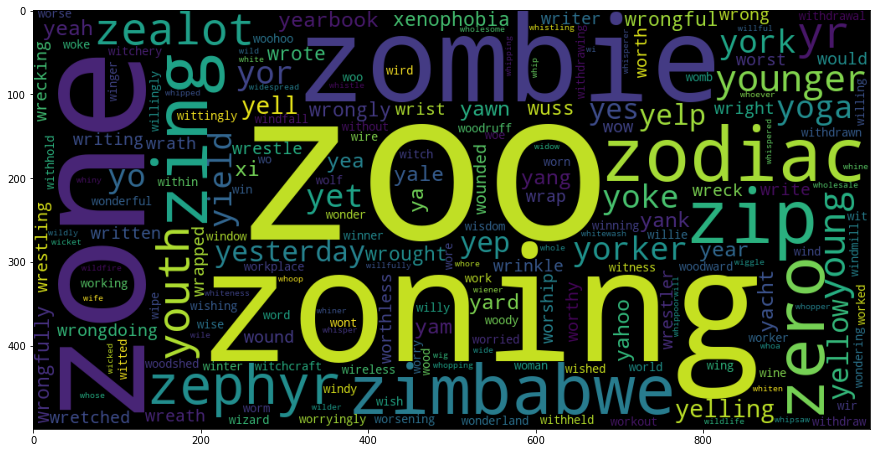

In [66]:
matrix1  = vectorizer.fit_transform(df[df['label']==1]['title'])
overall_title = vectorizer.vocabulary_
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(overall_title)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

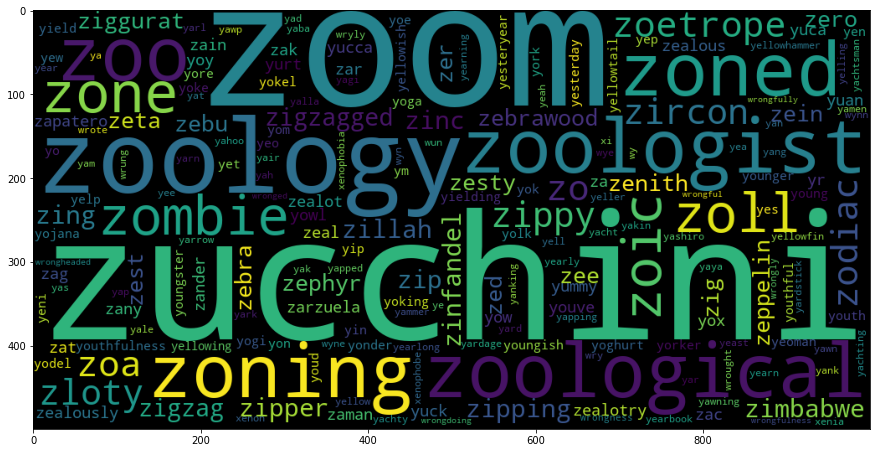

In [67]:
matrix1  = vectorizer.fit_transform(df[df['label']==0]['text'])
overall_title = vectorizer.vocabulary_
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(overall_title)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

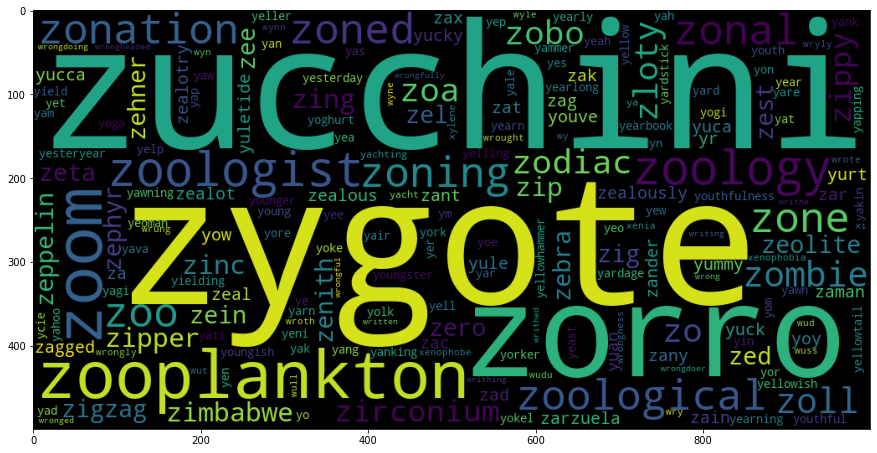

In [68]:
matrix1  = vectorizer.fit_transform(df[df['label']==1]['text'])
overall_title = vectorizer.vocabulary_
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(overall_title)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

# Co relation

In [74]:
sample_df = df

In [75]:
sample_df.head(3)

,Unnamed: 0,title,text,label,total_content
0,0,law enforcement high alert following threat co...,comment member movement hanging white people c...,1,law enforcement high alert following threat co...
2,2,unbelievable attorney general say rioter peace...,demonstrator last night constitutional right p...,1,unbelievable obama attorney general say charlo...
3,3,bobby raised us story conversion woo potential...,dozen politically active pastor came private d...,0,bobby jindal raised hindu us story christian c...


In [82]:
import numpy as np
sample_df['num_words_title'] = sample_df["title"].apply(lambda x: [len(w) for w in x.split()])
sample_df['num_words_text'] = sample_df["text"].apply(lambda x: np.mean([len(w) for w in x.split()]))

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [99]:

from nltk.tokenize import word_tokenize

df['num_words_title'] = df['title'].apply(word_tokenize).tolist()
df['num_words_title'] = df['num_words_title'].apply(len)

df['num_words_text'] = df['text'].apply(word_tokenize).tolist()
df['num_words_text'] = df['num_words_text'].apply(len)

In [100]:
sample_df.head(3)

,Unnamed: 0,title,text,label,total_content,num_words_title,num_words_text
0,0,law enforcement high alert following threat co...,comment member movement hanging white people c...,1,law enforcement high alert following threat co...,10,392
2,2,unbelievable attorney general say rioter peace...,demonstrator last night constitutional right p...,1,unbelievable obama attorney general say charlo...,11,17
3,3,bobby raised us story conversion woo potential...,dozen politically active pastor came private d...,0,bobby jindal raised hindu us story christian c...,8,581


In [89]:
sample_df['title'][0]

'law enforcement high alert following threat cop white terrorist video'

In [79]:
sample_df['text'][0]

'comment member movement hanging white people cop radio show night turn tide kill white people cop send message killing black people one f organizer sunshine radio show sunshine f ing opinion radio show snapshot twitter page p show urging supporter call tonight continue dismantle illusion white snapshot twitter radio call invite radio show p eastern standard time show caller clearly call killing white people minute clip radio show provided someone would like already received death threat result interrupting conference call unidentified black man said mother f start f ing like u bunch ni er takin one u roll said cause already roll gang anyway six seven black mother f see white person lynch as let turn table cop losing people state emergency one two thing would happen big as r war ni er going start already getting f k got lose sunshine could saying yep true f king true said need turn table getting shot somebody need become sacrifice side said everybody whatever like say everybody differe

**Fake news num of words in title:**

In [103]:
int(sample_df.loc[df['label'] == 1, 'num_words_title'].mean())

7

**Real news num of words in title :**

In [104]:
int(sample_df.loc[df['label'] == 0, 'num_words_title'].mean())

6

**Fake news number of words in text:**

In [105]:
int(sample_df.loc[df['label'] == 1, 'num_words_text'].mean())

228

**Real news number of words in text:**

In [106]:
int(sample_df.loc[df['label'] == 0, 'num_words_text'].mean())

261

In [135]:
sample_df_1 = pd.read_csv(r'/content/drive/MyDrive/DATASET/dataset.csv')
sample_df_1.head(3)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1


In [145]:
sample_df_1.dropna(inplace=True)
sample_df_1.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [146]:
from nltk.tokenize import sent_tokenize

sample_df_1['review_sentence_count'] = sample_df_1['text'].apply(sent_tokenize).tolist()
sample_df_1['review_sentence_count'] = sample_df_1['review_sentence_count'].apply(len)

In [147]:
sample_df_1.head(3)

,Unnamed: 0,title,text,label,review_sentence_count
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,47
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,2
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,48


In [150]:
print('fake news sentence count: ',int(sample_df_1.loc[df['label'] == 0, 'review_sentence_count'].mean()))

fake news sentence count:  25


In [152]:
print('Real news sentence count: ',int(sample_df_1.loc[df['label'] == 1, 'review_sentence_count'].mean()))

real news sentence count:  20


# Basic Model Build UP

In [ ]:
X = df.drop(['label','text','Unnamed: 0','title'], axis=1)
Y = df['label'] 

In [ ]:
X.head(3)

,total_content
0,law enforcement high alert following threat co...
2,unbelievable obama attorney general say charlo...
3,bobby jindal raised hindu us story christian c...


In [ ]:
Y.head(3)

0    1
2    1
3    0
Name: label, dtype: int64

In [ ]:
X = df['total_content'].values
Y = df['label'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
## 50K for training, 21k for testing

(50075, 192627)
(21462, 192627)
(50075,)
(21462,)


**SVM**

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
model = svm.SVC(kernel='linear') # Linear Kernel


In [ ]:
model.fit(X_train, Y_train)


SVC(kernel='linear')

In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9609542447115833


In [ ]:
y_pred = model.predict(X_test)
print(f1_score(Y_test, y_pred))

0.9620711505386077


In [ ]:
print(precision_score(Y_test, y_pred))

0.9576500270318976


In [ ]:
print(recall_score(Y_test, y_pred))  

0.9665332848308475


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model2  = MultinomialNB()
model2.fit(X_train,  Y_train)

MultinomialNB()

In [ ]:
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8835346979530704


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9609542447115833


In [ ]:
y_pred = model.predict(X_test)
print(f1_score(Y_test, y_pred))

0.9620711505386077


In [ ]:
print(precision_score(Y_test, y_pred))

0.9576500270318976


# RNN

In [ ]:
import tensorflow as tf

import keras

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, Activation, RepeatVector, Bidirectional, LSTM, Dropout, Embedding
from tensorflow.keras.layers import Embedding

from sklearn.model_selection import train_test_split 
from keras.losses import sparse_categorical_crossentropy
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import collections

from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import seaborn as sns 

SEED = 10

In [ ]:
X1 = df['total_content']
Y1 = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, stratify = Y1, random_state = SEED)

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(X_train)

In [ ]:
#return sequences
sequences = tok.texts_to_sequences(X_train)
test_sequences = tok.texts_to_sequences(X_test)

#print size of the vocabulary
print(f'Train vocabulary size: {len(tok.word_index)}')

Train vocabulary size: 169465


In [ ]:
#maximum sequence length (512 to prevent memory issues and speed up computation)
MAX_LEN = 512

#padded sequences
X_train_seq =keras.utils.pad_sequences(sequences,maxlen=MAX_LEN)
X_test_seq = keras.utils.pad_sequences(test_sequences,maxlen=MAX_LEN)

In [ ]:
X_train_seq.shape[1]


512

In [ ]:
#define the model
model = tf.keras.Sequential([
    Input(name='inputs',shape=[MAX_LEN]),
    Embedding(len(tok.word_index), 128),
    Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(128)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 128)          21691520  
                                                                 
 bidirectional (Bidirectiona  (None, 512, 256)         263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
history = model.fit(X_train_seq, y_train, epochs=20,
                    validation_split = 0.2, batch_size = 64)


Epoch 1/20
671/671 [==============================] - 98s 129ms/step - loss: 0.2989 - accuracy: 0.8703 - val_loss: 0.1557 - val_accuracy: 0.9421
Epoch 2/20
671/671 [==============================] - 86s 128ms/step - loss: 0.0986 - accuracy: 0.9678 - val_loss: 0.1027 - val_accuracy: 0.9619
Epoch 3/20
671/671 [==============================] - 86s 128ms/step - loss: 0.0459 - accuracy: 0.9871 - val_loss: 0.1237 - val_accuracy: 0.9630
Epoch 4/20
671/671 [==============================] - 86s 128ms/step - loss: 0.0268 - accuracy: 0.9924 - val_loss: 0.1371 - val_accuracy: 0.9640
Epoch 5/20
671/671 [==============================] - 86s 129ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.2055 - val_accuracy: 0.9583
Epoch 6/20
671/671 [==============================] - 86s 128ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.1890 - val_accuracy: 0.9603
Epoch 7/20
671/671 [==============================] - 86s 128ms/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.1801 - val_ac

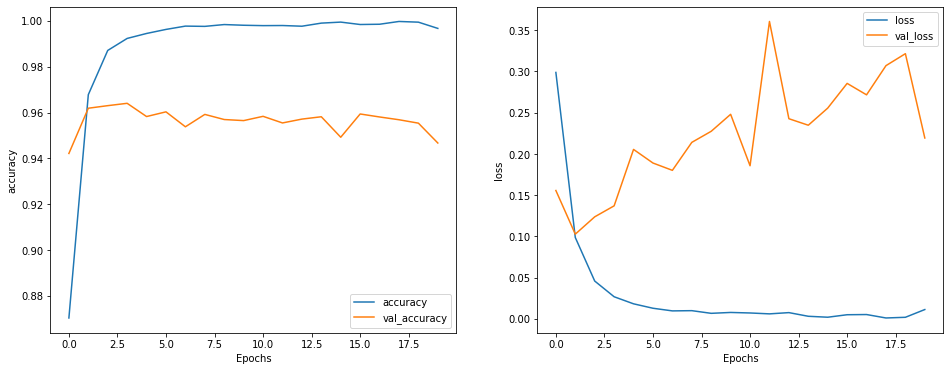

In [ ]:
#plot the train/validation loss and accuracy
def plot_graphs(history, metric):
    
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [ ]:
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
y_hat = model.predict(X_test_seq)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

559/559 [==============================] - 22s 37ms/step
Test Loss: 0.21964776515960693
Test Accuracy: 0.9467710256576538
